In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, concatenate, BatchNormalization
from keras.models import Model
from keras.datasets import cifar10
from keras.optimizers import Adam, SGD
from keras.regularizers import l1,l2
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, hsv2rgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load the dataset
(xtrain, _), (xtest, _) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

xtrain_red = xtrain[:,:,:,0]
xtrain_green = xtrain[:,:,:,1] 
xtrain_blue = xtrain[:,:,:,2]

xtest_red = xtest[:,:,:,0]
xtest_green = xtest[:,:,:,1] 
xtest_blue = xtest[:,:,:,2]

xtrain_red = xtrain_red.reshape(len(xtrain_red), np.prod(xtrain_red.shape[1:]))
xtrain_green = xtrain_green.reshape(len(xtrain_green), np.prod(xtrain_green.shape[1:]))
xtrain_blue = xtrain_blue.reshape(len(xtrain_blue), np.prod(xtrain_blue.shape[1:]))

xtest_red = xtest_red.reshape(len(xtest_red), np.prod(xtest_red.shape[1:]))
xtest_green = xtest_green.reshape(len(xtest_green), np.prod(xtest_green.shape[1:]))
xtest_blue = xtest_blue.reshape(len(xtest_blue), np.prod(xtest_blue.shape[1:]))


train_dset = []
train_dset.extend(xtrain_red)
train_dset.extend(xtrain_green)
train_dset.extend(xtrain_blue)
dset_train = np.asarray(train_dset)

test_dset = []
test_dset.extend(xtest_red)
test_dset.extend(xtest_green)
test_dset.extend(xtest_blue)
dset_test = np.asarray(test_dset)

In [4]:
input_layer = xtrain_red.shape[1]
hid_layer1 = 576
hid_layer2 = 256
hid_layer3 = 64
hid_layer4 = 10
hid_layer5 = hid_layer3
hid_layer6 = hid_layer2
hid_layer7 = hid_layer1
output_layer = input_layer
print(dset_train.shape)
print(dset_test.shape)

(150000, 1024)
(30000, 1024)


In [5]:
input_img = Input(shape=(input_layer,))

W0817 15:43:46.300128 139723275835264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 15:43:46.341849 139723275835264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [6]:
# network architecture
# vanilla autoencoder with fully-connected layer
# ENCODER
x = Dense(units = hid_layer1, activation='relu')(input_img)
x = Dense(units = hid_layer2, activation='relu')(x)
x = Dense(units = hid_layer3, activation='relu')(x)

encoded = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-12))(x)

# DECODER
x = Dense(units = hid_layer5, activation = 'relu')(encoded)
x = Dense(units = hid_layer6, activation='relu')(x)
x = Dense(units = hid_layer7, activation='relu')(x)

decoded = Dense(units = output_layer, activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

autoencoder.compile(optimizer= Adam(lr=1e-5), loss='mean_absolute_error')

W0817 15:43:46.369116 139723275835264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 15:43:46.521548 139723275835264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               147712    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               16640     
__________

In [8]:
# train the model
history = autoencoder.fit(dset_train, dset_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(dset_test, dset_test))

W0817 15:43:46.777620 139723275835264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0817 15:43:47.028280 139723275835264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 150000 samples, validate on 30000 samples
Epoch 1/100
150000/150000 [==============================] - 17s 115us/step - loss: 0.1886 - val_loss: 0.1657
Epoch 2/100
150000/150000 [==============================] - 13s 86us/step - loss: 0.1562 - val_loss: 0.1458
Epoch 3/100
150000/150000 [==============================] - 13s 87us/step - loss: 0.1376 - val_loss: 0.1319
Epoch 4/100
150000/150000 [==============================] - 13s 87us/step - loss: 0.1305 - val_loss: 0.1286
Epoch 5/100
150000/150000 [==============================] - 13s 86us/step - loss: 0.1274 - val_loss: 0.1256
Epoch 6/100
150000/150000 [==============================] - 13s 86us/step - loss: 0.1248 - val_loss: 0.1238
Epoch 7/100
150000/150000 [==============================] - 13s 86us/step - loss: 0.1233 - val_loss: 0.1224
Epoch 8/100
150000/150000 [==============================] - 13s 86us/step - loss: 0.1215 - val_loss: 0.1202
Epoch 9/100
150000/150000 [==============================] - 13s 86us/step -

dict_keys(['val_loss', 'loss'])


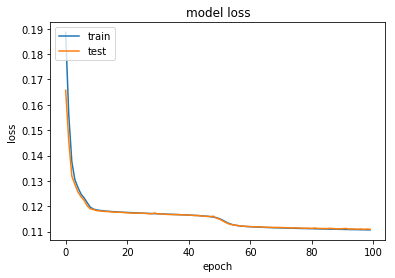

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

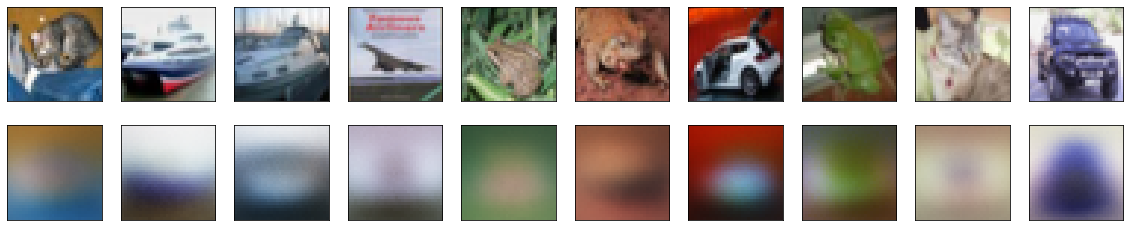

In [10]:
# show the result at the decoder output
decoded_imgs_red = autoencoder.predict(xtest_red)
decoded_imgs_green = autoencoder.predict(xtest_green)
decoded_imgs_blue = autoencoder.predict(xtest_blue)

counter = 0
n = 10
test_imgs = np.zeros((32,32,3))
dec_imgs = np.zeros((32,32,3))

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    test_imgs[:,:,0] = xtest_red[counter + i].reshape(32, 32)
    test_imgs[:,:,1] = xtest_green[counter + i].reshape(32, 32)
    test_imgs[:,:,2] = xtest_blue[counter + i].reshape(32, 32)

    plt.imshow(test_imgs)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    dec_imgs[:,:,0] = decoded_imgs_red[counter + i].reshape(32, 32)
    dec_imgs[:,:,1] = decoded_imgs_green[counter + i].reshape(32, 32)
    dec_imgs[:,:,2] = decoded_imgs_blue[counter + i].reshape(32, 32)

    plt.imshow(dec_imgs)
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

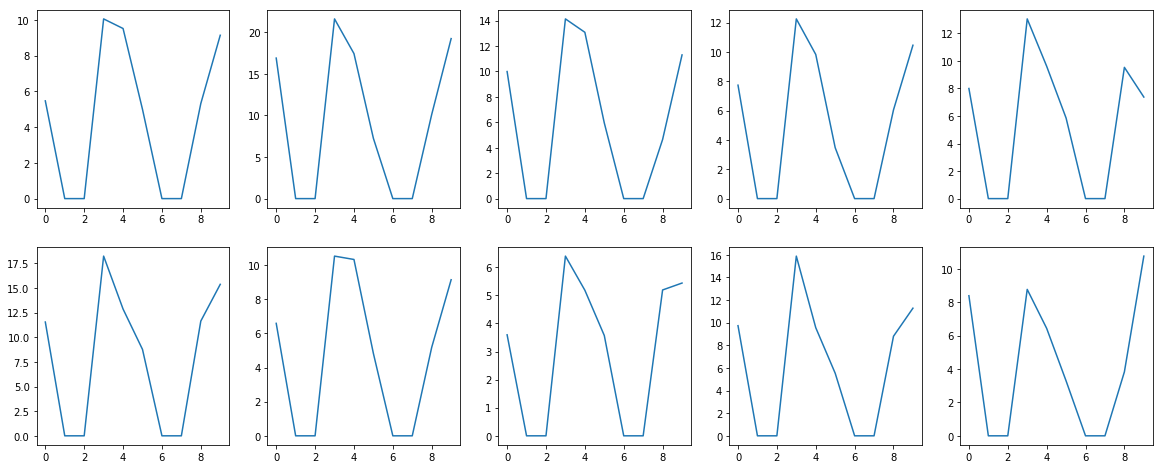

In [11]:
# show the representation at the bottleneck
encoded_imgs_red = encoder.predict(xtest_red)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs_red[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

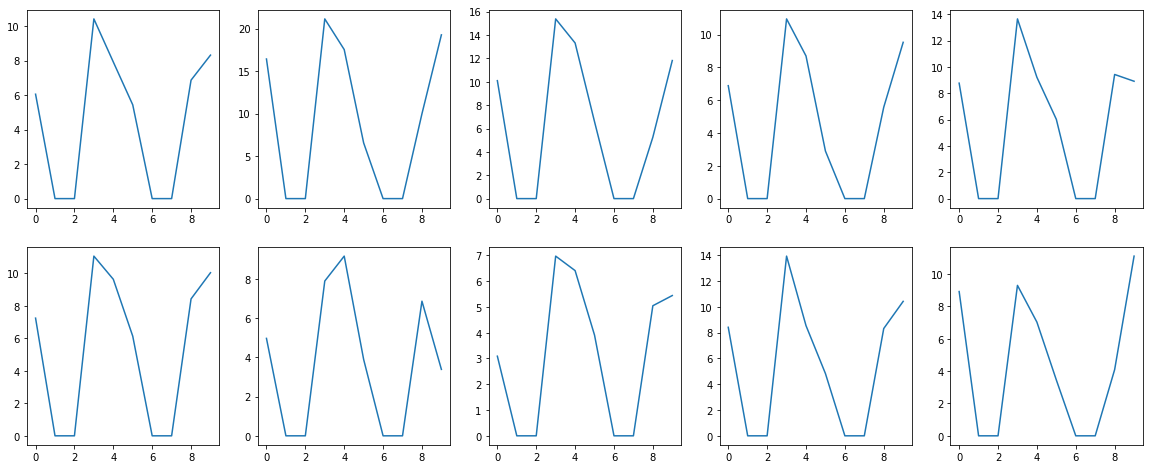

In [12]:
# show the representation at the bottleneck
encoded_imgs_green = encoder.predict(xtest_green)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs_green[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

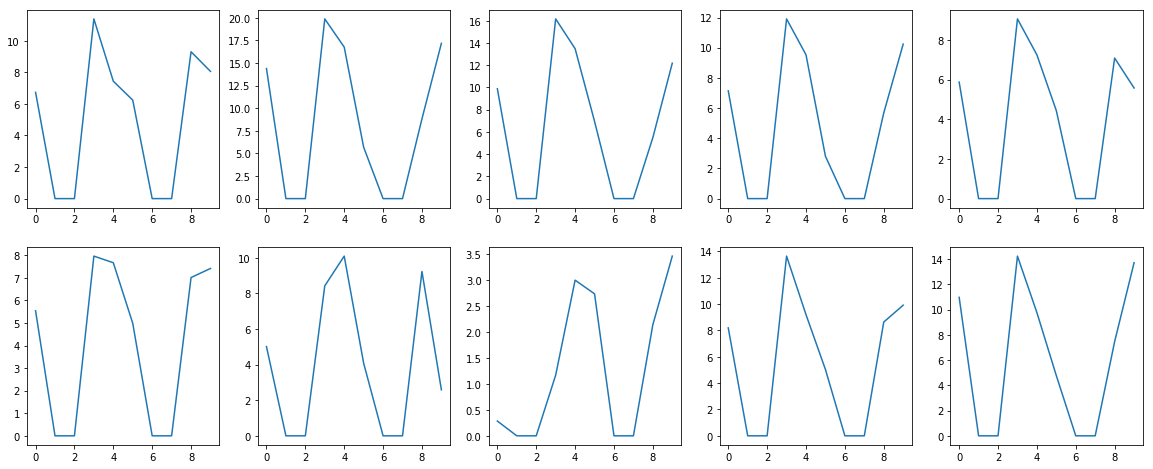

In [13]:
# show the representation at the bottleneck
encoded_imgs_blue = encoder.predict(xtest_blue)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs_blue[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

In [0]:
autoencoder.save('autoencoder_baseline.h5')

In [15]:
from keras.models import load_model
test_model = load_model('autoencoder_baseline.h5')

encoding = Input(shape = (hid_layer4,))
# DECODER
y = Dense(units = hid_layer5, activation = 'relu')(encoding)
y = Dense(units = hid_layer6, activation='relu')(y)
y = Dense(units = hid_layer7, activation='relu')(y)

decode_avg = Dense(units = output_layer, activation='sigmoid')(y)

newModel = Model(encoding, decode_avg)
newModel.summary()
newModel.layers[1].set_weights(test_model.layers[5].get_weights())
newModel.layers[2].set_weights(test_model.layers[6].get_weights())
newModel.layers[3].set_weights(test_model.layers[7].get_weights())
newModel.layers[4].set_weights(test_model.layers[8].get_weights())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_10 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_11 (Dense)             (None, 576)               148032    
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              590848    
Total params: 756,224
Trainable params: 756,224
Non-trainable params: 0
_________________________________________________________________


In [0]:
avg_bottleneck = (encoded_imgs_red + encoded_imgs_green + encoded_imgs_blue)/3.

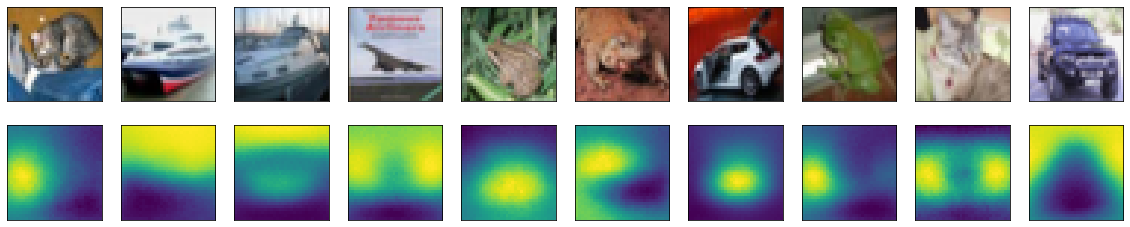

In [17]:
# show the result at the decoder output
decoded_imgs = newModel.predict(avg_bottleneck)

n = 10
test_imgs = np.zeros((32,32,3))

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    test_imgs[:,:,0] = xtest_red[counter + i].reshape(32, 32)
    test_imgs[:,:,1] = xtest_green[counter + i].reshape(32, 32)
    test_imgs[:,:,2] = xtest_blue[counter + i].reshape(32, 32)

    plt.imshow(test_imgs)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[counter + i].reshape(32,32))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(array([361., 189., 146., 149.,  60.,  48.,  32.,  19.,   9.,  11.]),
 array([6.9499016e-05, 5.7632215e-02, 1.1519493e-01, 1.7275764e-01,
        2.3032036e-01, 2.8788307e-01, 3.4544578e-01, 4.0300849e-01,
        4.6057123e-01, 5.1813394e-01, 5.7569665e-01], dtype=float32),
 <a list of 10 Patch objects>)

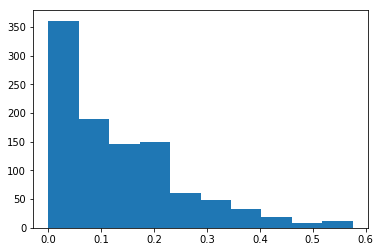

In [18]:
err_red = np.sqrt(np.square(xtest_red[1] - decoded_imgs_red[1]))
plt.hist(err_red)

(array([379., 173., 122., 139.,  67.,  44.,  36.,  28.,  19.,  17.]),
 array([9.5248222e-05, 5.0250400e-02, 1.0040555e-01, 1.5056071e-01,
        2.0071585e-01, 2.5087100e-01, 3.0102617e-01, 3.5118130e-01,
        4.0133646e-01, 4.5149159e-01, 5.0164676e-01], dtype=float32),
 <a list of 10 Patch objects>)

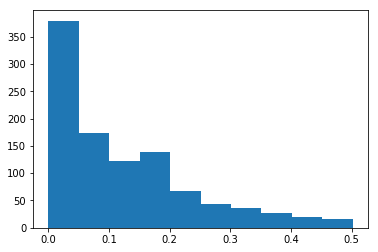

In [19]:
err_green = np.sqrt(np.square(xtest_green[1] - decoded_imgs_green[1]))
plt.hist(err_green)

(array([411., 170., 140., 116.,  65.,  54.,  31.,  16.,  13.,   8.]),
 array([4.33325768e-05, 5.30485585e-02, 1.06053784e-01, 1.59059003e-01,
        2.12064236e-01, 2.65069455e-01, 3.18074673e-01, 3.71079892e-01,
        4.24085140e-01, 4.77090359e-01, 5.30095577e-01], dtype=float32),
 <a list of 10 Patch objects>)

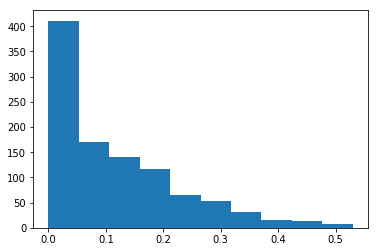

In [20]:
err_blue = np.sqrt(np.square(xtest_blue[1] - decoded_imgs_blue[1]))
plt.hist(err_blue)